In [1]:
#CIFAR stands for Canadian Institute for Advance Research
#we just use there dataset in which there are 10 classes present
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

E:\New folder\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#importing the important modules which we are going to use in
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output#to remove previous result from display
%matplotlib inline

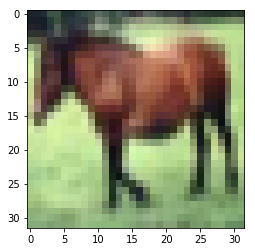

In [72]:
plt.imshow(x_train[7])#just to check particular row

# Lets Understand our dataset

In [6]:
np.array(x_train[0]).shape# at every row there 32*32*3 matrix is available

(32, 32, 3)

In [10]:
np.array(x_train[0][0]).shape#at every nested row there are 32 arrays of size of 3 each

(32, 3)

In [11]:
np.array(x_train[0][0])

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

#### We can understand 32*32*3 in such a way ( rows* columns* RGB). Our dataset is a image of 32*32 pixels where 3 represents the the value of Red , Green , Blue at that Particular Pixel

In [73]:
for i in range(len(y_train)):#just tweak the y dataset
    
    y_train[i]=random.randint(y_train[i]*10,y_train[i]*10+10)
    #if y_train[i]=0 then we randomply convert it into between 0 to 10
    #if y_train[i]=1 then we randomply convert it into between 10 to 20
    #if y_train[i]=2 then we randomply convert it into between 20 to 30 and so on.

In [12]:
print(y_train)#lets check out our data

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [13]:
#Now we are going to tweak x_train data and convert it into 50000*3072,   3072=32*32*3
x_train_tweaked=[]
for i in range(len(x_train)):
    x_train_tweaked.append(np.ndarray.flatten(x_train[i]))

In [14]:
x_train=np.array(x_train_tweaked)#covert it into array

In [15]:
x_train.shape

(50000, 3072)

In [16]:
x_train=x_train/x_train.max()#applying maximum value normalization

In [17]:
#here we reshape our target variable (y_train) so that it is easily to perform various matrix operations
y_train=np.array(y_train)
y_train=np.reshape(y_train,[1,len(y_train)])
y_train=y_train/y_train.max()
print(y_train)

[[0.66666667 1.         1.         ... 1.         0.11111111 0.11111111]]


In [18]:
def line(m,x,c):#eqation of line y=M1X1+M2X2+...+MnXn+c
    return np.dot(m,x.T)+c
def error(m,x,c,y):#now we are going to make error function ==>mean squared error
    return np.mean((line(m,x,c)-y)**2)
def derivative_slope(m,x,c,y):#now we are going to make derivative funtion for slope
    return 2*np.mean(np.multiply((line(m,x,c)-y),x.T),axis=1)
def derivative_inter(m,x,c,y):#now we are going to make derative function for intercept
    return 2*np.mean(line(m,x,c)-y)
def accuracy(error,y):
    return 100- (error/np.mean(y**2))*100

In [20]:
#now lets check out our good work
m=np.random.randn(1,3072)#randomly initialize value of m with the help of normal distribution
c=random.random()#take any random number as c
alpha=0.1#learning rate
cost=[]
for i in range(0,100):
    
    cost.append(error(m,x_train,c,y_train))#append current error in cost, just to plot and visualize it
    m=m-alpha*(derivative_slope(m,x_train,c,y_train)).T#m=m-learning_rate*d(error)/d(m)
    c=c-alpha*derivative_inter(m,x_train,c,y_train)#c=c-learning_rate*d(error)/d(c)
    clear_output(True)#just to remove the previous printed output from the display
    print(i,'  Current error-->',error(m,x_train,c,y_train),"  ",'Current Accuracy--->', accuracy(error(m,x_train,c,y_train),y_train))

99   Current error--> inf    Current Accuracy---> -inf


Text(0.5,1,'alpha=0.1')

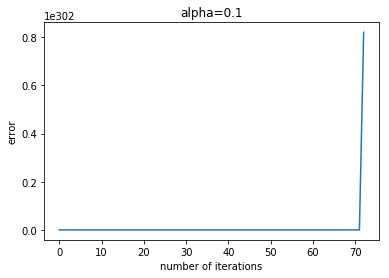

In [21]:
plt.plot(cost)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("alpha=0.1")